In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading data from Ecommerce Costomers file

In [2]:
customers = pd.read_csv('.\Ecommerce Customers')

Lets check what is the data we got inside the file
getiing some quick insights of dataset

In [3]:
customers.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


From above we can see that averge time spent on website is quite high than time spet on app. Lets plot
some inshights to see if we can get some relation between columns

# Exploratory data analysis

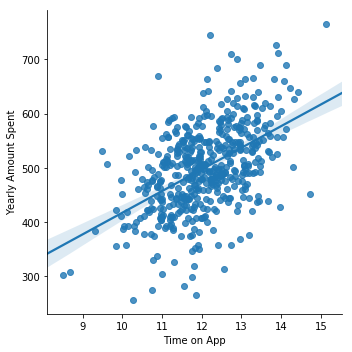

In [7]:
sns.lmplot(x='Time on App', y='Yearly Amount Spent',data=customers)

So with increase in time spent on App is increasing the yearly amount spent.

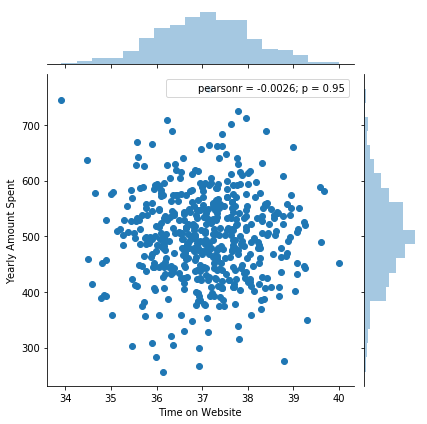

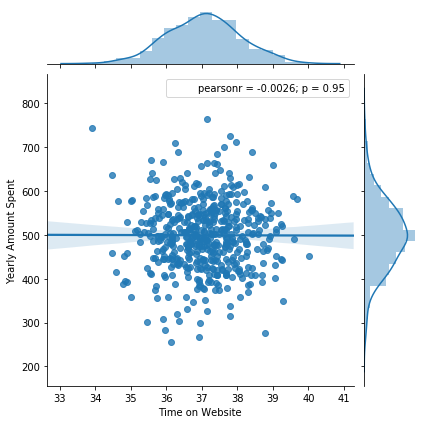

In [8]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers,kind='reg')

Graph of Time Spent on Web does not show any specific relation with anual spent

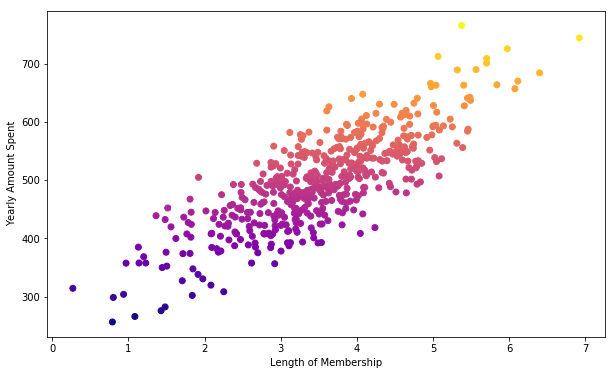

In [8]:
plt.figure(figsize=(10,6))
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.scatter(customers['Length of Membership'],customers['Yearly Amount Spent'],c=customers['Yearly Amount Spent'],cmap='plasma')
plt.show()

From above plot column Length of Membership is directly propertional to column Yearly Amount Spent.
Lets see if there is any relation between Time spent on App and Length of Membership

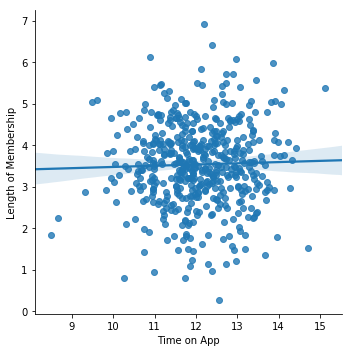

In [9]:
sns.lmplot(x ='Time on App',y='Length of Membership',data=customers)

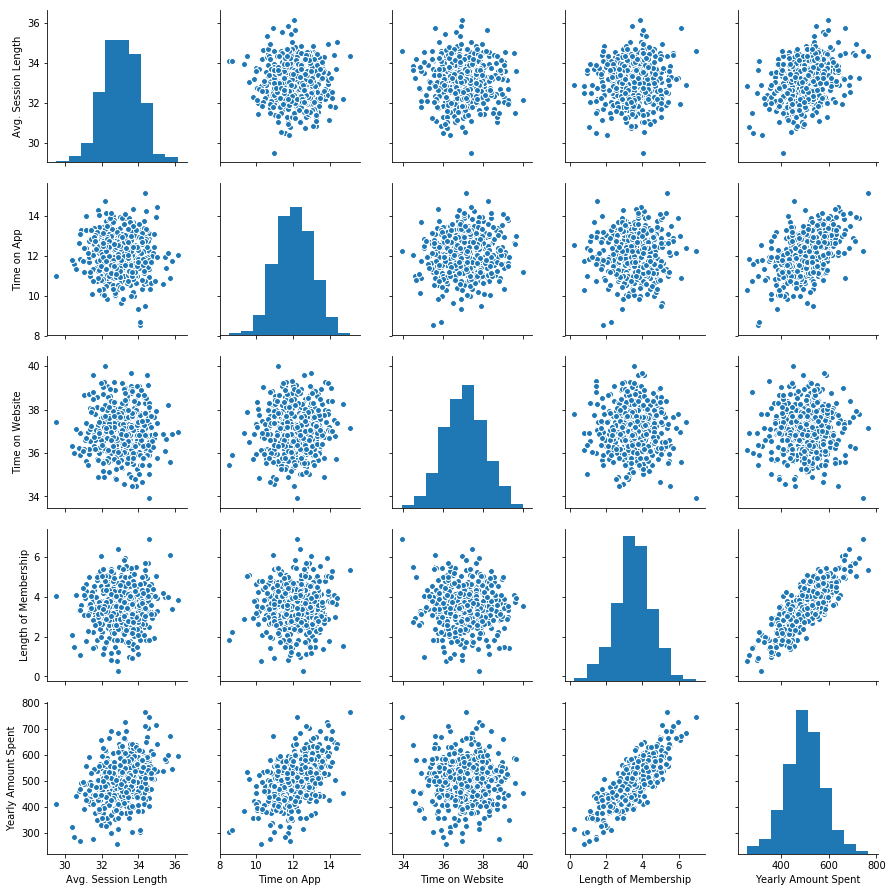

In [11]:
sns.pairplot(customers)

After plotting these columns its time to build a machine learning model to predict Yearly amount spent.
If model can precict yearly amount spent accurately with very less error then we can get importance of 
columns using model coefficients.As we have less no of feature columns we can use Linear Regression model.

# Implementing machine learning

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
predictors = customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = customers['Yearly Amount Spent']

Preparing data to train and test is crucial part in successfull implementation and cross validation 
of machine learning model. As we have only one file we need to split the same data for traning of model and testing. Data should be should be shuffled properly before spliting to ensure we are getting random combination of data to train model. train_test_split of sklearn.model_selection can do the task quite easily.
test_size parameter decides how much data will be in test dataset. In my case i want 30% data in test and remaining 70% data in train dataset.

In [13]:
x_train,x_test,y_train,y_test = train_test_split(predictors,y,test_size=0.3,random_state=108)

In [14]:
linearModel = LinearRegression()
linearModel.fit(x_train,y_train)
y_predictions = linearModel.predict(x_test)

# verify result and evaluate model

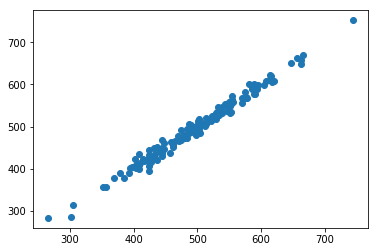

In [16]:
plt.scatter(y_test,y_predictions)

In [15]:
errors=y_test-y_predictions

In [16]:
from sklearn import metrics

Using metrices module of sklearn to get absolute error, squared error and mean squared error

In [17]:
print("abs error: {}".format(metrics.mean_absolute_error(y_test,y_predictions)))
print("squared error: {}".format(metrics.mean_squared_error(y_test,y_predictions)))
print("root mean squared error: {}".format(np.sqrt(metrics.mean_squared_error(y_test,y_predictions))))

abs error: 7.850915547713131
squared error: 97.33732813810512
root mean squared error: 9.86596818047297


Plotting a histogram of error array to see how errors are distributed

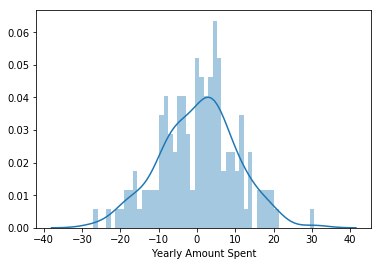

In [18]:
sns.distplot(errors,bins=50)

Now Lets print coefficients to check how columns are effecting yearly amount spent 

In [19]:
coefficients = pd.DataFrame(linearModel.coef_,index=x_train.columns)
print(linearModel.coef_.shape)

(4,)


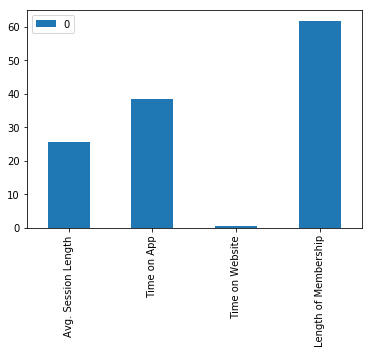

In [20]:
coefficients.plot.bar()

In [21]:
coefficients.shape

(4, 1)

In [22]:
coefficients.head()

,0
Avg. Session Length,25.612503
Time on App,38.485830
Time on Website,0.569818
Length of Membership,61.918842


coefficients shows that mobile app is playing more important role in yearly amount spent.
So company should focus more on developing mobile application